In [38]:
import pandas as pd
import numpy as np

In [39]:
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke = df_stroke.drop(columns='id')
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [41]:
df_stroke = df_stroke.fillna(df_stroke['bmi'].mean())
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [42]:
df_stroke.select_dtypes(include=('int64','float64')).columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [43]:
numeric_col = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_col

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [44]:
categorical_col = [col for col in df_stroke if col not in numeric_col]
categorical_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df_stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [47]:
lst = []
for col in df_stroke.columns:
    a = df_stroke.groupby('stroke')[col].value_counts()
    a = pd.DataFrame(a).reset_index()
    lst.append(a)

In [54]:
lst[2].iloc[:, 1:]

,hypertension,count
0,0,4429
1,1,432
2,0,183
3,1,66


In [ ]:
# fig , axes = plt.subplots(figsize=(26,16), nrows=2, ncols=5)
# axes = axes.flatten()
# for i, col in enumerate(df_stroke[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
#                                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
#                                     'smoking_status']]):
#     ax = axes[i]
#     sns.barplot(lst[i],x =col, y='stroke' ,ax = axes[i])

C:\Users\LE HOANG GIA VI\AppData\Local\Temp\ipykernel_11756\399588716.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_stroke, x=col, ax=ax, palette='rainbow')
C:\Users\LE HOANG GIA VI\AppData\Local\Temp\ipykernel_11756\399588716.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stroke, x='stroke', y=col, ax=ax, errorbar=None, palette= 'Set2')
C:\Users\LE HOANG GIA VI\AppData\Local\Temp\ipykernel_11756\399588716.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stroke, x='stroke', y=col, ax=ax, errorbar=No

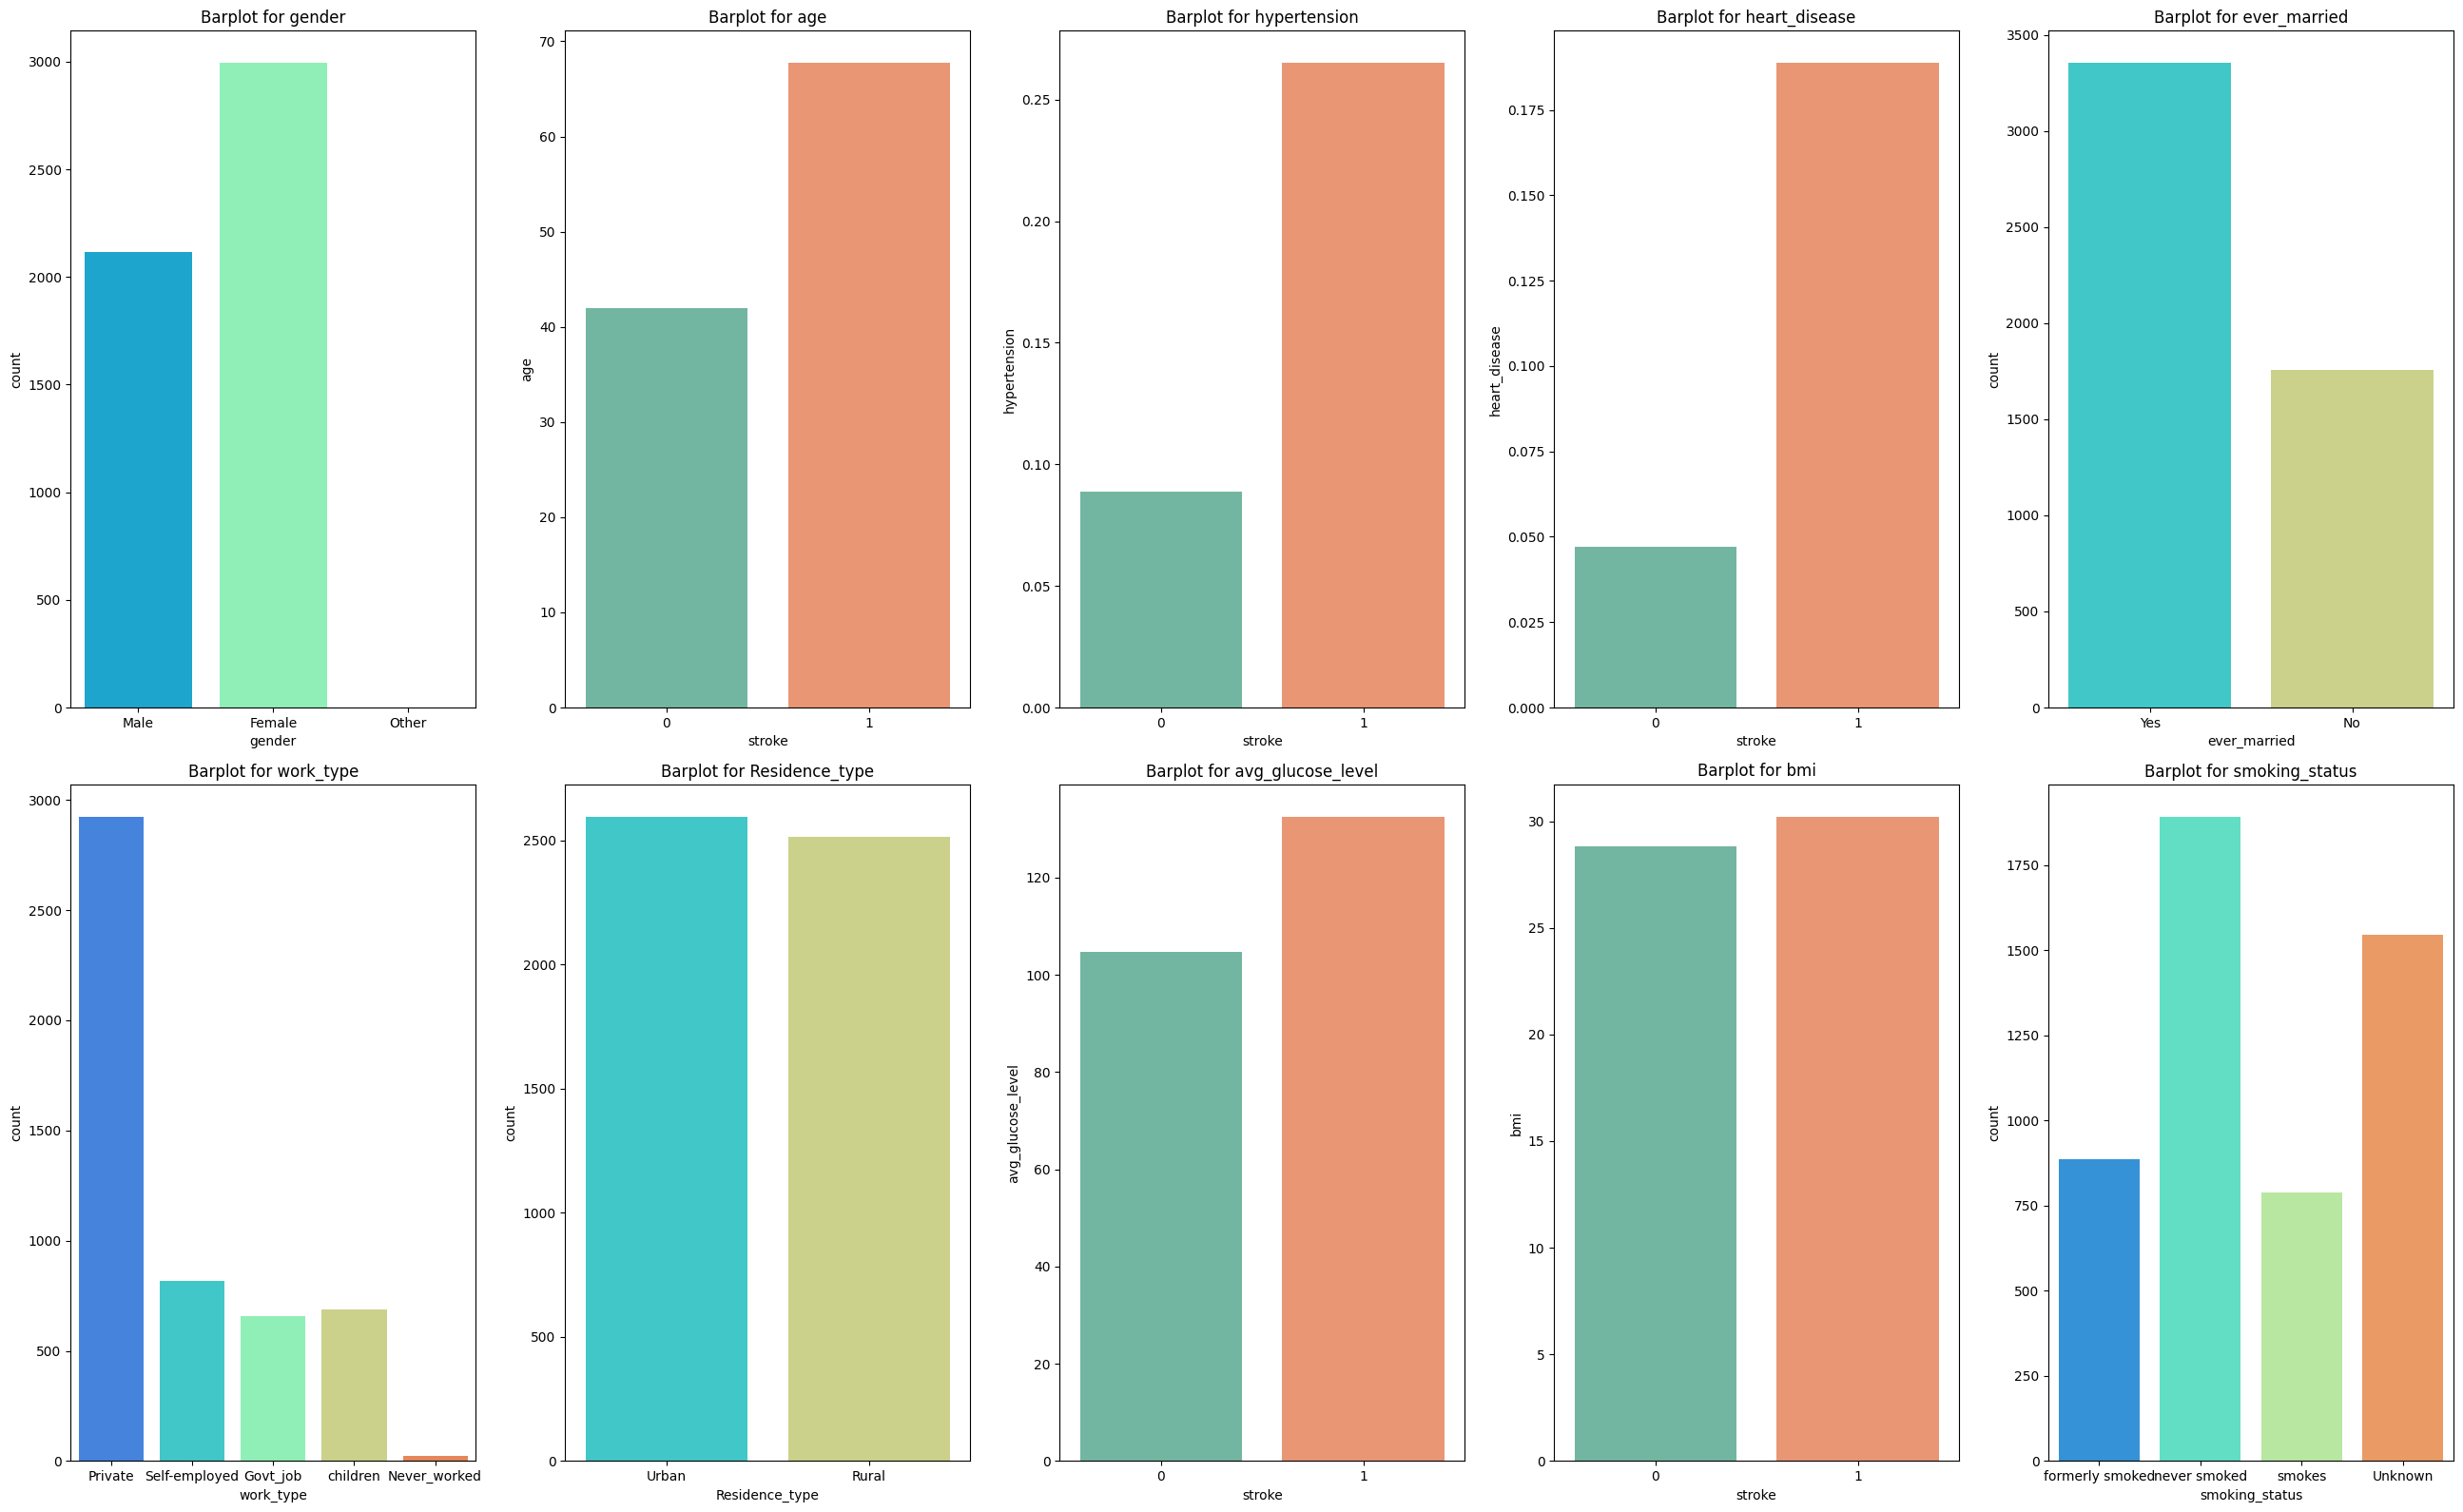

In [74]:
# Chuẩn bị dữ liệu và thông tin cần thiết
columns_to_plot = [
    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'
]

fig, axes = plt.subplots(figsize=(26, 16), nrows=2, ncols=5)
axes = axes.flatten()

# Tạo biểu đồ barplot cho từng cột
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    if df_stroke[col].dtype == 'object':
        # Với các cột phân loại, đếm số lượng từng giá trị
        sns.countplot(data=df_stroke, x=col, ax=ax, palette='rainbow')
    else:
        # Với các cột số, vẽ biểu đồ phân bố trung bình theo trạng thái stroke
        sns.barplot(data=df_stroke, x='stroke', y=col, ax=ax, errorbar=None, palette= 'Set2')
    ax.set_title(f'Barplot for {col}')

plt.tight_layout()
plt.show();


In [32]:
# df_stroke.groupby('age')['stroke'].value_counts()

In [33]:
# df_stroke.groupby('hypertension')['stroke'].value_counts()

In [34]:
# sns.boxplot(df_stroke.groupby('hypertension')['stroke'].value_counts())

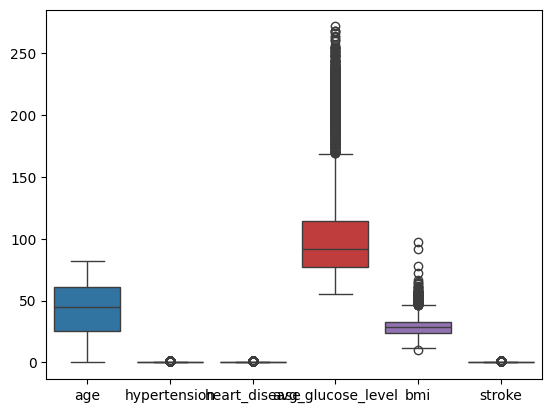

In [37]:
sns.boxplot(df_stroke);